## 1. Import Libraries

In [1]:
import numpy as np

import pandas as pd

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
	OneHotEncoder,
	OrdinalEncoder,
	StandardScaler,
	MinMaxScaler,
	PowerTransformer,
	FunctionTransformer
)

from feature_engine.outliers import Winsorizer
from feature_engine.datetime import DatetimeFeatures
from feature_engine.selection import SelectBySingleFeaturePerformance
from feature_engine.encoding import (
	RareLabelEncoder,
	MeanEncoder,
	CountFrequencyEncoder
)

import matplotlib.pyplot as plt

import warnings

## 2. Display Settings

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
sklearn.set_config(transform_output="pandas")

In [4]:
warnings.filterwarnings("ignore")

## 3. Read Data

note : feature engineering is performed on the train dataset, and the same transformations
are applied to the test dataset.

In [5]:
path = r"C:/Users/Abhinay/Desktop/flight-prediction-sageMaker/data/train.csv"
train = pd.read_csv(path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-04-09,Delhi,Cochin,05:55:00,19:15:00,2240,2,No info,7711
1,Air India,2019-06-03,Delhi,Cochin,07:10:00,07:40:00,1470,2,No info,12698
2,Air India,2019-05-15,Kolkata,Banglore,16:45:00,21:05:00,1700,1,No info,7452
3,Vistara,2019-06-15,Chennai,Kolkata,07:05:00,09:20:00,135,0,No info,3687
4,Jet Airways,2019-04-09,Delhi,Cochin,23:05:00,19:00:00,1195,2,No info,9483
...,...,...,...,...,...,...,...,...,...,...
635,Multiple Carriers,2019-03-06,Delhi,Cochin,11:30:00,19:15:00,465,1,No info,15077
636,Indigo,2019-04-21,Delhi,Cochin,02:00:00,07:45:00,345,1,No info,6258
637,Indigo,2019-06-09,Kolkata,Banglore,22:15:00,00:50:00,155,0,No info,5224
638,Indigo,2019-05-18,Delhi,Cochin,14:20:00,22:30:00,490,1,No info,7640


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   airline          640 non-null    object
 1   date_of_journey  640 non-null    object
 2   source           640 non-null    object
 3   destination      640 non-null    object
 4   dep_time         640 non-null    object
 5   arrival_time     640 non-null    object
 6   duration         640 non-null    int64 
 7   total_stops      640 non-null    int64 
 8   additional_info  640 non-null    object
 9   price            640 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 50.1+ KB


In [7]:
X_train = train.drop(columns=["price"])
y_train = train.price.copy()

## 4. Transformation operations

### 4.1 `airline`

In [8]:
train.airline

0              Air India
1              Air India
2              Air India
3                Vistara
4            Jet Airways
             ...        
635    Multiple Carriers
636               Indigo
637               Indigo
638               Indigo
639            Air India
Name: airline, Length: 640, dtype: object

In [9]:
airline_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("grouper", RareLabelEncoder(tol=0.1, n_categories=2, replace_with="Other")),
        ("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
    ])
airline_transformer.fit_transform(X_train.loc[:, ["airline"]])

,airline_Air India,airline_Indigo,airline_Jet Airways,airline_Multiple Carriers,airline_Other
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
635,0.0,0.0,0.0,1.0,0.0
636,0.0,1.0,0.0,0.0,0.0
637,0.0,1.0,0.0,0.0,0.0
638,0.0,1.0,0.0,0.0,0.0


In [10]:
airline_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("grouper", RareLabelEncoder(tol=0.1, n_categories=2, replace_with="Other")),
        ("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
    ])
airline_transformer.fit_transform(X_train.loc[:, ["airline"]])

,airline_Air India,airline_Indigo,airline_Jet Airways,airline_Multiple Carriers,airline_Other
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
635,0.0,0.0,0.0,1.0,0.0
636,0.0,1.0,0.0,0.0,0.0
637,0.0,1.0,0.0,0.0,0.0
638,0.0,1.0,0.0,0.0,0.0


### 4.2 `date_of_journey`


In [11]:
X_train.date_of_journey

0      2019-04-09
1      2019-06-03
2      2019-05-15
3      2019-06-15
4      2019-04-09
          ...    
635    2019-03-06
636    2019-04-21
637    2019-06-09
638    2019-05-18
639    2019-03-24
Name: date_of_journey, Length: 640, dtype: object

In [12]:
feature_to_extract = ["month", "week", "day_of_week", "day_of_year"]

doj_transformer = Pipeline(steps=[
	("dt", DatetimeFeatures(features_to_extract=feature_to_extract, yearfirst=True, format="mixed")),
	("scaler", MinMaxScaler())
])

doj_transformer.fit_transform(X_train.loc[:, ["date_of_journey"]])

,date_of_journey_month,date_of_journey_week,date_of_journey_day_of_week,date_of_journey_day_of_year
0,0.333333,0.352941,0.166667,0.330508
1,1.000000,0.823529,0.000000,0.796610
2,0.666667,0.647059,0.333333,0.635593
3,1.000000,0.882353,0.833333,0.898305
4,0.333333,0.352941,0.166667,0.330508
...,...,...,...,...
635,0.000000,0.058824,0.333333,0.042373
636,0.333333,0.411765,1.000000,0.432203
637,1.000000,0.823529,1.000000,0.847458
638,0.666667,0.647059,0.833333,0.661017


### 4.3 `source` and `destination`

In [13]:
X_train.loc[:, ['source', 'destination']]

,source,destination
0,Delhi,Cochin
1,Delhi,Cochin
2,Kolkata,Banglore
3,Chennai,Kolkata
4,Delhi,Cochin
...,...,...
635,Delhi,Cochin
636,Delhi,Cochin
637,Kolkata,Banglore
638,Delhi,Cochin


In [14]:
location_subset = X_train.loc[:, ["source", "destination"]]

In [15]:
type(location_subset)

pandas.core.frame.DataFrame

In [16]:
location_pipe1 = Pipeline(steps = [
  ("grouper", RareLabelEncoder(tol=0.05, n_categories=2, replace_with="Other")),  
  ("encoder", MeanEncoder()),
  ("scaler", PowerTransformer())
])
location_pipe1.fit_transform(location_subset, y_train)

,source,destination
0,0.928428,0.928428
1,0.928428,0.928428
2,0.238265,0.238265
3,-1.887700,-1.887700
4,0.928428,0.928428
...,...,...
635,0.928428,0.928428
636,0.928428,0.928428
637,0.238265,0.238265
638,0.928428,0.928428


create a new feature  `is_north` 

In [17]:
np.union1d(X_train.source.unique(), X_train.destination.unique())

array(['Banglore', 'Chennai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'Mumbai'], dtype=object)

In [18]:
def is_north(df): # df is a df with 2 cols 'source' and 'destination'
  cols = df.columns.to_list()
  north_cities = ['Delhi']
  return(         
    df           
    .assign(**{  
        f"{col}_is_north": df.loc[:,col].isin(north_cities).astype(int)
        for col in cols   
    }) #assign is used to create or update  a colm
    .drop(columns=['source','destination'])
  )         
is_north(location_subset)
FunctionTransformer(func=is_north)

,func,<function is_...001F278E3BE20>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None
,inv_kw_args,None


In [19]:
FunctionTransformer(func=is_north).fit_transform(location_subset)

,source_is_north,destination_is_north
0,1,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
635,1,0
636,1,0
637,0,0
638,1,0


In [20]:
location_transformer = FeatureUnion(transformer_list=[
    ("location_pipe1", location_pipe1),
    ("is_north", FunctionTransformer(func=is_north))
])
location_transformer.fit_transform(location_subset, y_train)

,source,destination,source_is_north,destination_is_north
0,0.928428,0.928428,1,0
1,0.928428,0.928428,1,0
2,0.238265,0.238265,0,0
3,-1.887700,-1.887700,0,0
4,0.928428,0.928428,1,0
...,...,...,...,...
635,0.928428,0.928428,1,0
636,0.928428,0.928428,1,0
637,0.238265,0.238265,0,0
638,0.928428,0.928428,1,0


### 4.4 `dep_time` and `arrival_time`

In [21]:
time_subset =  X_train.loc[:, ['dep_time', 'arrival_time']]

In [22]:
time_pipe1 = Pipeline(steps=[
    ("dt", DatetimeFeatures(features_to_extract=["hour", "minute"], yearfirst=True, format="mixed")),
    ("scaler", MinMaxScaler())
])
time_pipe1.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute
0,0.217391,1.000000,0.826087,0.272727
1,0.304348,0.181818,0.304348,0.727273
2,0.695652,0.818182,0.913043,0.090909
3,0.304348,0.090909,0.391304,0.363636
4,1.000000,0.090909,0.826087,0.000000
...,...,...,...,...
635,0.478261,0.545455,0.826087,0.272727
636,0.086957,0.000000,0.304348,0.818182
637,0.956522,0.272727,0.000000,0.909091
638,0.608696,0.363636,0.956522,0.545455


new colm as per hour of the day

In [26]:
def part_of_the_day(df, mor=7, noon=12, eve=16, night =20):
  cols = df.columns.to_list()
  df_temp = df.assign(**{
    col: pd.to_datetime(df.loc[:, col]).dt.hour
    for col in cols
  })
  return (
    df_temp
    .assign(**{
      f"{col}_part_of_day":np.select(
        [df_temp.loc[:, col].between(mor, noon, inclusive="left"),
         df_temp.loc[:, col].between(noon, eve, inclusive="left"),
         df_temp.loc[:, col].between(eve, night, inclusive="left"),
        ],
        ["morning", "afternoon", "evening" ],
        default="night"
      )
      for col in cols
    })
    .drop(columns=cols)
  )
FunctionTransformer(func=part_of_the_day).fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,night,evening
1,morning,morning
2,evening,night
3,morning,morning
4,night,evening
...,...,...
635,morning,evening
636,night,morning
637,night,night
638,afternoon,night


In [28]:
time_pipe2 = Pipeline(steps=[
  ("part", FunctionTransformer(func=part_of_the_day)),
  ("encoder", CountFrequencyEncoder()),
  ("scaler", MinMaxScaler())
])
time_pipe2.fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,0.965278,0.377622
1,1.000000,0.272727
2,0.340278,1.000000
3,1.000000,0.272727
4,0.965278,0.377622
...,...,...
635,1.000000,0.377622
636,0.965278,0.272727
637,0.965278,1.000000
638,0.000000,1.000000


In [29]:
time_transformer = FeatureUnion(transformer_list=[
    ("time_pipe1", time_pipe1),
    ("time_pipe2", time_pipe2)
])
time_transformer.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute,dep_time_part_of_day,arrival_time_part_of_day
0,0.217391,1.000000,0.826087,0.272727,0.965278,0.377622
1,0.304348,0.181818,0.304348,0.727273,1.000000,0.272727
2,0.695652,0.818182,0.913043,0.090909,0.340278,1.000000
3,0.304348,0.090909,0.391304,0.363636,1.000000,0.272727
4,1.000000,0.090909,0.826087,0.000000,0.965278,0.377622
...,...,...,...,...,...,...
635,0.478261,0.545455,0.826087,0.272727,1.000000,0.377622
636,0.086957,0.000000,0.304348,0.818182,0.965278,0.272727
637,0.956522,0.272727,0.000000,0.909091,0.965278,1.000000
638,0.608696,0.363636,0.956522,0.545455,0.000000,1.000000


### 4.5 `duration`

In [57]:
X_train.duration

0      2240
1      1470
2      1700
3       135
4      1195
       ... 
635     465
636     345
637     155
638     490
639    2000
Name: duration, Length: 640, dtype: int64

In [40]:
class RBFPercentileSimilarity(BaseEstimator, TransformerMixin):
	def __init__(self, variables=None, percentiles=[0.25, 0.5, 0.75], gamma=0.1):
		self.variables = variables
		self.percentiles = percentiles
		self.gamma = gamma


	def fit(self, X, y=None):
		if not self.variables:
			self.variables = X.select_dtypes(include="number").columns.to_list()

		self.reference_values_ = {
			col: (
				X
				.loc[:, col]
				.quantile(self.percentiles)
				.values
				.reshape(-1, 1)
			)
			for col in self.variables
		}

		return self


	def transform(self, X):
		objects = []
		for col in self.variables:
			columns = [f"{col}_rbf_{int(percentile * 100)}" for percentile in self.percentiles]
			obj = pd.DataFrame(
				data=rbf_kernel(X.loc[:, [col]], Y=self.reference_values_[col], gamma=self.gamma),
				columns=columns
			)
			objects.append(obj)
		return pd.concat(objects, axis=1)

In [41]:
RBFPercentileSimilarity(percentiles=[0.4, 0.8]).fit_transform(X_train)


,duration_rbf_40,duration_rbf_80,total_stops_rbf_40,total_stops_rbf_80
0,0.000000e+00,0.0,0.904837,0.904837
1,0.000000e+00,0.0,0.904837,0.904837
2,0.000000e+00,0.0,1.000000,1.000000
3,0.000000e+00,0.0,0.904837,0.904837
4,0.000000e+00,0.0,0.904837,0.904837
...,...,...,...,...
635,0.000000e+00,0.0,1.000000,1.000000
636,8.194013e-40,0.0,1.000000,1.000000
637,0.000000e+00,0.0,0.904837,0.904837
638,0.000000e+00,0.0,1.000000,1.000000


In [42]:
def duration_category(X, short=180, med=400):
	return (
		X
		.assign(duration_cat=np.select([X.duration.lt(short),
									    X.duration.between(short, med, inclusive="left")],
									   ["short", "medium"],
									   default="long"))
		.drop(columns="duration")
	)

In [43]:
def is_over(X, value=1000):
	return (
		X
		.assign(**{
			f"duration_over_{value}": X.duration.ge(value).astype(int)
		})
		.drop(columns="duration")
	)

In [44]:
duration_pipe1 = Pipeline(steps=[
	("rbf", RBFPercentileSimilarity()),
	("scaler", PowerTransformer())
])

duration_pipe2 = Pipeline(steps=[
	("cat", FunctionTransformer(func=duration_category)),
	("encoder", OrdinalEncoder(categories=[["short", "medium", "long"]]))
])

duration_union = FeatureUnion(transformer_list=[
	("part1", duration_pipe1),
	("part2", duration_pipe2),
	("part3", FunctionTransformer(func=is_over)),
	("part4", StandardScaler())
])

duration_transformer = Pipeline(steps=[
	("outliers", Winsorizer(capping_method="iqr", fold=1.5)),
	("imputer", SimpleImputer(strategy="median")),
	("union", duration_union)
])

duration_transformer.fit_transform(X_train.loc[:, ["duration"]])

,duration_rbf_25,duration_rbf_50,duration_rbf_75,duration_cat,duration_over_1000,duration
0,-0.376491,-0.142224,-0.113162,2.0,1,2.857044
1,-0.376491,-0.142224,-0.113162,2.0,1,1.742285
2,-0.376491,-0.142224,-0.113162,2.0,1,2.216541
3,-0.376491,-0.142224,-0.113162,0.0,0,-1.010462
4,-0.376491,-0.142224,-0.113162,2.0,1,1.175239
...,...,...,...,...,...,...
635,-0.376491,-0.142224,-0.113162,2.0,0,-0.330008
636,-0.376491,-0.142224,-0.113162,1.0,0,-0.577446
637,-0.376491,-0.142224,-0.113162,0.0,0,-0.969222
638,-0.376491,-0.142224,-0.113162,2.0,0,-0.278458


### 4.6 `total_stops`

In [58]:
X_train.total_stops

0      2
1      2
2      1
3      0
4      2
      ..
635    1
636    1
637    0
638    1
639    2
Name: total_stops, Length: 640, dtype: int64

In [47]:
def is_direct(X):
	return X.assign(is_direct_flight=X.total_stops.eq(0).astype(int))


total_stops_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="most_frequent")),
	("", FunctionTransformer(func=is_direct))
])

total_stops_transformer.fit_transform(X_train.loc[:, ["total_stops"]])

,total_stops,is_direct_flight
0,2,0
1,2,0
2,1,0
3,0,1
4,2,0
...,...,...
635,1,0
636,1,0
637,0,1
638,1,0


### 4.7 `additional_info`

In [60]:
X_train.additional_info

0      No info
1      No info
2      No info
3      No info
4      No info
        ...   
635    No info
636    No info
637    No info
638    No info
639    No info
Name: additional_info, Length: 640, dtype: object

In [61]:
X_train.additional_info.value_counts()

additional_info
No info                         519
In-flight meal not included     103
No check-in baggage included     17
1 Long layover                    1
Name: count, dtype: int64

In [50]:
info_pipe1 = Pipeline(steps=[
	("group", RareLabelEncoder(tol=0.1, n_categories=2, replace_with="Other")),
	("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

info_pipe1.fit_transform(X_train.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No info,additional_info_Other
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
635,0.0,1.0,0.0
636,0.0,1.0,0.0
637,0.0,1.0,0.0
638,0.0,1.0,0.0


In [51]:
def have_info(X):
	return X.assign(additional_info=X.additional_info.ne("No Info").astype(int))

In [53]:
info_union = FeatureUnion(transformer_list=[
	("part1", info_pipe1),
	("part2", FunctionTransformer(func=have_info))
])

In [54]:
info_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="constant", fill_value="unknown")),
	("union", info_union)
])

info_transformer.fit_transform(X_train.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No info,additional_info_Other,additional_info
0,0.0,1.0,0.0,1
1,0.0,1.0,0.0,1
2,0.0,1.0,0.0,1
3,0.0,1.0,0.0,1
4,0.0,1.0,0.0,1
...,...,...,...,...
635,0.0,1.0,0.0,1
636,0.0,1.0,0.0,1
637,0.0,1.0,0.0,1
638,0.0,1.0,0.0,1


In [62]:
X_train.columns.tolist()

['airline',
 'date_of_journey',
 'source',
 'destination',
 'dep_time',
 'arrival_time',
 'duration',
 'total_stops',
 'additional_info']

In [56]:
estimator = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)

selector = SelectBySingleFeaturePerformance(
	estimator=estimator,
	scoring="r2",
	threshold=0.1
) 

## 5. Column Transformer

In [63]:
column_transformer = ColumnTransformer(transformers=[
        ("airline", airline_transformer, ["airline"]),
        ("date_of_journey", doj_transformer, ["date_of_journey"]),
        ("location", location_transformer, ["source", "destination"]),
        ("time", time_transformer, ["dep_time", "arrival_time"]),
        ("dur", duration_transformer, ["duration"]),
        ("stops", total_stops_transformer, ["total_stops"]),
	    ("info", info_transformer, ["additional_info"])
        
    ], remainder="passthrough")
column_transformer.fit_transform(X_train, y_train)

,airline__airline_Air India,airline__airline_Indigo,airline__airline_Jet Airways,airline__airline_Multiple Carriers,airline__airline_Other,date_of_journey__date_of_journey_month,date_of_journey__date_of_journey_week,date_of_journey__date_of_journey_day_of_week,date_of_journey__date_of_journey_day_of_year,location__source,location__destination,location__source_is_north,location__destination_is_north,time__dep_time_hour,time__dep_time_minute,time__arrival_time_hour,time__arrival_time_minute,time__dep_time_part_of_day,time__arrival_time_part_of_day,dur__duration_rbf_25,dur__duration_rbf_50,dur__duration_rbf_75,dur__duration_cat,dur__duration_over_1000,dur__duration,stops__total_stops,stops__is_direct_flight,info__additional_info_In-flight meal not included,info__additional_info_No info,info__additional_info_Other,info__additional_info
0,1.0,0.0,0.0,0.0,0.0,0.333333,0.352941,0.166667,0.330508,0.928428,0.928428,1,0,0.217391,1.000000,0.826087,0.272727,0.965278,0.377622,-0.376491,-0.142224,-0.113162,2.0,1,2.857044,2,0,0.0,1.0,0.0,1
1,1.0,0.0,0.0,0.0,0.0,1.000000,0.823529,0.000000,0.796610,0.928428,0.928428,1,0,0.304348,0.181818,0.304348,0.727273,1.000000,0.272727,-0.376491,-0.142224,-0.113162,2.0,1,1.742285,2,0,0.0,1.0,0.0,1
2,1.0,0.0,0.0,0.0,0.0,0.666667,0.647059,0.333333,0.635593,0.238265,0.238265,0,0,0.695652,0.818182,0.913043,0.090909,0.340278,1.000000,-0.376491,-0.142224,-0.113162,2.0,1,2.216541,1,0,0.0,1.0,0.0,1
3,0.0,0.0,0.0,0.0,1.0,1.000000,0.882353,0.833333,0.898305,-1.887700,-1.887700,0,0,0.304348,0.090909,0.391304,0.363636,1.000000,0.272727,-0.376491,-0.142224,-0.113162,0.0,0,-1.010462,0,1,0.0,1.0,0.0,1
4,0.0,0.0,1.0,0.0,0.0,0.333333,0.352941,0.166667,0.330508,0.928428,0.928428,1,0,1.000000,0.090909,0.826087,0.000000,0.965278,0.377622,-0.376491,-0.142224,-0.113162,2.0,1,1.175239,2,0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.0,0.0,0.0,1.0,0.0,0.000000,0.058824,0.333333,0.042373,0.928428,0.928428,1,0,0.478261,0.545455,0.826087,0.272727,1.000000,0.377622,-0.376491,-0.142224,-0.113162,2.0,0,-0.330008,1,0,0.0,1.0,0.0,1
636,0.0,1.0,0.0,0.0,0.0,0.333333,0.411765,1.000000,0.432203,0.928428,0.928428,1,0,0.086957,0.000000,0.304348,0.818182,0.965278,0.272727,-0.376491,-0.142224,-0.113162,1.0,0,-0.577446,1,0,0.0,1.0,0.0,1
637,0.0,1.0,0.0,0.0,0.0,1.000000,0.823529,1.000000,0.847458,0.238265,0.238265,0,0,0.956522,0.272727,0.000000,0.909091,0.965278,1.000000,-0.376491,-0.142224,-0.113162,0.0,0,-0.969222,0,1,0.0,1.0,0.0,1
638,0.0,1.0,0.0,0.0,0.0,0.666667,0.647059,0.833333,0.661017,0.928428,0.928428,1,0,0.608696,0.363636,0.956522,0.545455,0.000000,1.000000,-0.376491,-0.142224,-0.113162,2.0,0,-0.278458,1,0,0.0,1.0,0.0,1


In [64]:
preprocessor = Pipeline(steps=[
	("ct", column_transformer),
	("selector", selector)
])

preprocessor.fit_transform(X_train, y_train)

,airline__airline_Indigo,airline__airline_Jet Airways,date_of_journey__date_of_journey_week,date_of_journey__date_of_journey_day_of_year,dur__duration_rbf_25,dur__duration_cat,dur__duration,stops__total_stops,stops__is_direct_flight
0,0.0,0.0,0.352941,0.330508,-0.376491,2.0,2.857044,2,0
1,0.0,0.0,0.823529,0.796610,-0.376491,2.0,1.742285,2,0
2,0.0,0.0,0.647059,0.635593,-0.376491,2.0,2.216541,1,0
3,0.0,0.0,0.882353,0.898305,-0.376491,0.0,-1.010462,0,1
4,0.0,1.0,0.352941,0.330508,-0.376491,2.0,1.175239,2,0
...,...,...,...,...,...,...,...,...,...
635,0.0,0.0,0.058824,0.042373,-0.376491,2.0,-0.330008,1,0
636,1.0,0.0,0.411765,0.432203,-0.376491,1.0,-0.577446,1,0
637,1.0,0.0,0.823529,0.847458,-0.376491,0.0,-0.969222,0,1
638,1.0,0.0,0.647059,0.661017,-0.376491,2.0,-0.278458,1,0


In [65]:
feature_performances = preprocessor.named_steps["selector"].feature_performance_
feature_performances

{'airline__airline_Air India': np.float64(-0.012560897074830915),
 'airline__airline_Indigo': np.float64(0.10996171938572064),
 'airline__airline_Jet Airways': np.float64(0.17693515933155993),
 'airline__airline_Multiple Carriers': np.float64(-0.002919150197867667),
 'airline__airline_Other': np.float64(0.06919525707784062),
 'date_of_journey__date_of_journey_month': np.float64(0.06398126851305141),
 'date_of_journey__date_of_journey_week': np.float64(0.15529130672990674),
 'date_of_journey__date_of_journey_day_of_week': np.float64(0.014412622457773453),
 'date_of_journey__date_of_journey_day_of_year': np.float64(0.18499388248191942),
 'location__source': np.float64(0.08171106234126475),
 'location__destination': np.float64(0.08171106234126475),
 'location__source_is_north': np.float64(0.025810836503105117),
 'location__destination_is_north': np.float64(-0.00044504976085761133),
 'time__dep_time_hour': np.float64(-0.041227579127652104),
 'time__dep_time_minute': np.float64(0.0294374291

In [66]:
sorted_feat_imp = dict(sorted(feature_performances.items(), key=lambda val: val[1]))
sorted_feat_imp

{'dur__duration_rbf_50': np.float64(-0.1251114845988108),
 'time__dep_time_part_of_day': np.float64(-0.04512047206585231),
 'time__dep_time_hour': np.float64(-0.041227579127652104),
 'time__arrival_time_part_of_day': np.float64(-0.019026467471243702),
 'info__additional_info_No info': np.float64(-0.014212343695236532),
 'info__additional_info_In-flight meal not included': np.float64(-0.013982316482575715),
 'dur__duration_rbf_75': np.float64(-0.013723437653947679),
 'airline__airline_Air India': np.float64(-0.012560897074830915),
 'info__additional_info': np.float64(-0.012446653275461092),
 'time__arrival_time_hour': np.float64(-0.011087430741350176),
 'airline__airline_Multiple Carriers': np.float64(-0.002919150197867667),
 'info__additional_info_Other': np.float64(-0.0014170190714441293),
 'location__destination_is_north': np.float64(-0.00044504976085761133),
 'time__arrival_time_minute': np.float64(0.008460761355879698),
 'date_of_journey__date_of_journey_day_of_week': np.float64(0.

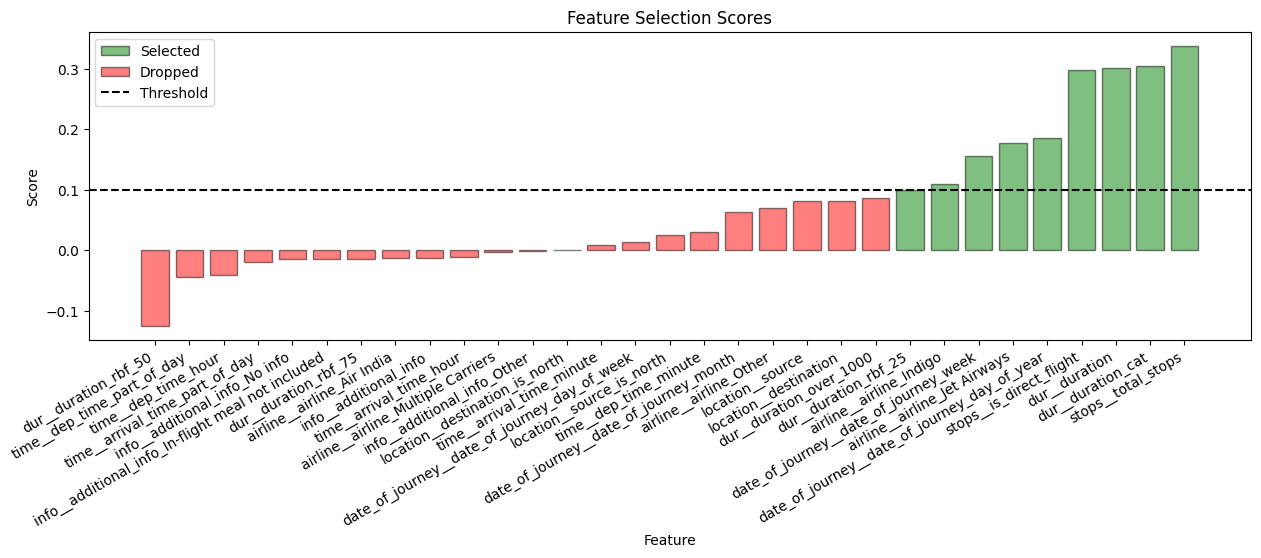

In [67]:
THRESHOLD = 0.1

selected_bar = None
dropped_bar = None
colors = ["red" if score < THRESHOLD else "green" for score in sorted_feat_imp.values()]


fig, ax = plt.subplots(figsize=(15, 4)) 

for i, (feature, score) in enumerate(sorted_feat_imp.items()):
	params = dict(
		x=i,
		height=score,
		edgecolor="black",
		alpha=0.5
	)
	
	if score < THRESHOLD:
		bar = ax.bar(
			color="red",
			**params
		)
		if not dropped_bar:
			dropped_bar = bar[0]
	else:
		bar = ax.bar(
			color="green",
			**params
		)
		if not selected_bar:
			selected_bar = bar[0]

thresh_line = ax.axhline(
	y=0.1,
	color="black",
	linestyle="--"
)

ax.set_xticks(
	ticks=range(len(sorted_feat_imp)),
	labels=list(sorted_feat_imp.keys()),
	rotation=30,
	ha="right"
)

ax.set(
	xlabel="Feature",
	ylabel="Score",
	title="Feature Selection Scores"
)

ax.legend(
	handles=[selected_bar, dropped_bar, thresh_line],
	labels=["Selected", "Dropped", "Threshold"],
	loc="upper left"
)

plt.show()